In [1]:
import pandas as pd

exports = pd.read_excel('energy_bal.xls', index_col=0)
exports.head()

,2019M01,2019M02,2019M03,2019M04,2019M05,2019M06,2019M07,2019M08,2019M09,2019M10,...,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09,2020M10,2020M11
country,,,,,,,,,,,,,,,,,,,,,
Belgium,272,122,276,250,190,67,126,296,140,290,...,228.8,240.5,176.5,256.2,354.3,211,237.4,293.3,278.1,257.9
Bulgaria,52,29,54,12,46,67,52,39,54,52,...,36.006,30.197,33.926,32.915,35.328,35.214,52.2,28.036,37.253,38.878
Czechia,1,3,5,4,2,2,1,0,1,2,...,5,2,2,1,2,1,:,:,:,:
Denmark,93,6,93,116,87,70,102,50,89,126,...,90,103,174,67,61,31,92,122,52,:
Germany (until 1990 former territory of the FRG),659.647,742.932,471.363,582.856,521.599,488.448,500.268,633.023,509.832,427.883,...,397.686,660.848,629.705,717.3,527.424,619.642,586.246,243.536,486.271,:


In [2]:
for col in exports:
    try:
        exports[col]=exports[col].replace(':',0)
        exports[col]=exports[col].astype(int)
    except ValueError:
        pass

exports.info()    


<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, Belgium to Georgia
Data columns (total 23 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   2019M01  36 non-null     int64
 1   2019M02  36 non-null     int64
 2   2019M03  36 non-null     int64
 3   2019M04  36 non-null     int64
 4   2019M05  36 non-null     int64
 5   2019M06  36 non-null     int64
 6   2019M07  36 non-null     int64
 7   2019M08  36 non-null     int64
 8   2019M09  36 non-null     int64
 9   2019M10  36 non-null     int64
 10  2019M11  36 non-null     int64
 11  2019M12  36 non-null     int64
 12  2020M01  36 non-null     int64
 13  2020M02  36 non-null     int64
 14  2020M03  36 non-null     int64
 15  2020M04  36 non-null     int64
 16  2020M05  36 non-null     int64
 17  2020M06  36 non-null     int64
 18  2020M07  36 non-null     int64
 19  2020M08  36 non-null     int64
 20  2020M09  36 non-null     int64
 21  2020M10  36 non-null     int64
 22  2020M11  36 non-null  

In [3]:
exports = exports.rename(columns={'2019M01': '2019-01-01','2019M02': '2019-02-01','2019M03': '2019-03-01',
                                  '2019M04': '2019-04-01',
                                 '2019M05': '2019-05-01','2019M06': '2019-06-01','2019M07': '2019-07-01',
                                  '2019M08': '2019-08-01',
                                 '2019M09': '2019-09-01','2019M10': '2019-10-01','2019M11': '2019-11-01',
                                  '2019M12': '2019-12-01','2020M01': '2020-01-01', '2020M02': '2020-02-01',
                                  '2020M03': '2020-03-01', '2020M04': '2020-04-01', '2020M05': '2020-05-01', 
                                  '2020M06': '2020-06-01','2020M07': '2020-07-01', '2020M08': '2020-08-01', 
                                  '2020M09': '2020-09-01', '2020M10': '2020-10-01', '2020M11': '2020-11-01'})

import datetime
pd.to_datetime(exports.columns)

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01'],
              dtype='datetime64[ns]', freq=None)

In [4]:
exports['2019'] = exports.iloc[:,0:12].sum(axis=1)

clean_data = exports.loc[exports['2019']>3000]
clean_data = clean_data.rename(index = {'Germany (until 1990 former territory of the FRG)':'Germany'})

clean_data['2020'] = clean_data.iloc[:,12:22].sum(axis=1)
totals=clean_data.filter(['2019','2020'],axis=1)

totals.head()

,2019,2020
country,,
Germany,6697,5504
France,5781,6006
Netherlands,22434,6815
Poland,4234,3425
United Kingdom,5899,3098


Text(0.5, 1.0, 'Russian Exports To Major Partners (mt)')

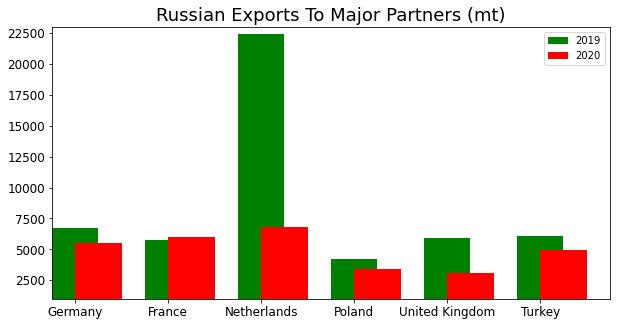

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline

clean_data['2019'].plot.bar(legend=True,color='green',figsize=(10,5),align='center',rot='0',fontsize='12',
                         ylim=[1000,23000], ylabel='',xlabel='')

clean_data['2020'].plot.bar(legend=True,color='red',figsize=(10,5),rot='0',align='edge',fontsize='12',
                         ylim=[1000,23000], ylabel='',xlabel='')

plt.title('Russian Exports To Major Partners (mt)', fontsize=18)


Clear effect of Covid on exports, apart from very small increase into France, majority of countries experienced big drop in their imports from Russia